In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import numpy as np
import pandas as pd
import math

In [3]:
df =pd.read_csv("/gdrive/Shareddrives/FYP Project/Dataset/FoodData_modified.csv")

In [4]:
df

,Name,Group,Glycemic index,Insulin index,Serving Size,Acidity (Based on PRAL),GI Category,Calories (kcal),Net Carbs ( grams),Protein (g),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
0,"Bread, wheat, toasted",baked-products,60.0,100,1 oz (28.35 grams),4.9 (acidic),medium,313,51.07,12.96,...,0.32,0.31,0.15,0.0,0.99,1.02,1.72,NaN,NaN,NaN
1,"Biscuits, plain or buttermilk, prepared from r...",baked-products,44.0,48,1 oz (28.35 grams),3.4 (acidic),low,353,43.10,7.00,...,0.35,0.31,0.16,3.0,4.32,6.93,4.16,NaN,NaN,NaN
2,"Bread, french or vienna (includes sourdough)",baked-products,70.0,NaN,1 oz (28.35 grams),5.2 (acidic),medium,272,49.68,10.75,...,NaN,NaN,NaN,0.0,0.53,0.36,0.86,44.23,0.51,0.01
3,"Cake, chocolate, prepared from recipe without ...",baked-products,41.0,82,"1 piece (1/12 of 9"" dia) (95 grams)",2 (acidic),low,371,51.80,5.30,...,0.27,0.28,0.12,58.0,5.43,6.04,2.76,NaN,NaN,NaN
4,"Cake, fruitcake, commercially prepared",baked-products,53.0,NaN,1 piece (43 grams),-0.7 (alkaline),low,324,57.90,2.90,...,0.14,0.14,0.07,5.0,1.05,4.20,3.32,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,"Cabbage, napa, cooked",vegetables,32.0,NaN,1 cup (109 grams),-1.2 (alkaline),low,12,2.23,1.10,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00
622,"Grape leaves, raw",vegetables,NaN,NaN,1 leaf (3 grams),-6.8 (alkaline),NaN,93,6.31,5.60,...,NaN,NaN,NaN,0.0,0.34,0.08,1.07,NaN,NaN,0.00
623,"Peppers, ancho, dried",vegetables,NaN,NaN,1 pepper (17 grams),-41.1 (alkaline),NaN,281,29.82,11.86,...,0.36,0.49,0.23,0.0,0.82,0.49,4.51,NaN,NaN,0.00
624,"Epazote, raw",vegetables,NaN,NaN,1 tbsp (0.8 grams),-16.7 (alkaline),NaN,32,3.64,0.33,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00


In [5]:
df.describe()

,Glycemic index,Calories (kcal),Net Carbs ( grams),Protein (g),Fats (g),Carbs (g),Net carbs (g),Sugar (g),Fiber (g),Calcium (mg),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
count,550.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,485.000000,581.000000,621.000000,...,427.000000,428.000000,426.000000,601.000000,597.000000,590.000000,590.000000,112.000000,184.000000,343.000000
mean,35.363636,216.998403,19.527412,8.220064,10.756198,22.770831,19.541757,9.053361,3.479174,107.190016,...,0.457611,0.521425,0.994038,30.079867,3.570285,4.307458,2.804780,12.125000,2.168859,0.124927
std,25.224070,188.224764,23.340832,9.186056,18.993655,25.012394,23.333177,16.763168,7.061645,308.883300,...,0.442380,0.511791,10.456163,87.005710,7.407209,9.187711,9.073928,18.773504,6.001451,0.863885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,60.250000,2.532500,1.202500,0.300000,3.592500,2.532500,0.420000,0.000000,12.000000,...,0.080000,0.090000,0.040000,0.000000,0.050000,0.050000,0.090000,0.000000,0.040000,0.000000
50%,33.000000,165.500000,9.360000,4.145000,2.005000,13.050000,9.375000,2.500000,1.500000,30.000000,...,0.320000,0.320000,0.160000,0.000000,0.600000,0.595000,0.450000,1.745000,0.490000,0.000000
75%,54.000000,327.000000,28.497500,13.370000,13.887500,33.457500,28.497500,8.550000,3.300000,91.000000,...,0.750000,0.892500,0.460000,30.000000,3.680000,4.840000,1.922500,16.417500,1.565000,0.000000
max,104.000000,902.000000,99.980000,75.160000,100.000000,99.980000,99.980000,99.800000,70.100000,5876.000000,...,2.350000,2.310000,153.000000,1085.000000,82.480000,72.960000,153.000000,73.300000,55.600000,14.890000


In [6]:
df.columns

Index(['Name', 'Group', 'Glycemic index', 'Insulin index', 'Serving Size',
       'Acidity (Based on PRAL)', 'GI Category', 'Calories (kcal)',
       'Net Carbs ( grams)', 'Protein (g)', 'Fats (g)', 'Carbs (g)',
       'Net carbs (g)', 'Sugar (g)', 'Fiber (g)', 'Calcium (mg)', 'Iron (mg)',
       'Magnesium (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Sodium (mg)',
       'Zinc (mg)', 'Copper (mg)', 'Vitamin A (IU)', 'Vitamin E (mg)',
       'Vitamin D (µg)', 'Vitamin C (mg)', 'Vitamin B1 (mg)',
       'Vitamin B2 (mg)', 'Vitamin B3 (mg)', 'Vitamin B5 (mg)',
       'Vitamin B6 (mg)', 'Folate (µg)', 'Vitamin B12 (µg)', 'Vitamin K (µg)',
       'Tryptophan (mg)', 'Threonine (mg)', 'Isoleucine (mg)', 'Leucine (mg)',
       'Lysine (mg)', 'Methionine (mg)', 'Phenylalanine (mg)', 'Valine (mg)',
       'Histidine (mg)', 'Cholesterol (mg)', 'Saturated Fat (g)',
       'Monounsaturated Fat (g)', 'Polyunsaturated fat (g)', 'Starch (g)',
       'Fructose (g)', 'Trans Fat (g)'],
      dtype='obje

In [7]:
dataset = df.drop(labels=['Insulin index', 'Serving Size', 'Acidity (Based on PRAL)', 'Net Carbs ( grams)'], axis = 1)

In [8]:
dataset

,Name,Group,Glycemic index,GI Category,Calories (kcal),Protein (g),Fats (g),Carbs (g),Net carbs (g),Sugar (g),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
0,"Bread, wheat, toasted",baked-products,60.0,medium,313,12.96,4.27,55.77,51.07,6.42,...,0.32,0.31,0.15,0.0,0.99,1.02,1.72,NaN,NaN,NaN
1,"Biscuits, plain or buttermilk, prepared from r...",baked-products,44.0,low,353,7.00,16.30,44.60,43.10,2.18,...,0.35,0.31,0.16,3.0,4.32,6.93,4.16,NaN,NaN,NaN
2,"Bread, french or vienna (includes sourdough)",baked-products,70.0,medium,272,10.75,2.42,51.88,49.68,4.62,...,NaN,NaN,NaN,0.0,0.53,0.36,0.86,44.23,0.51,0.01
3,"Cake, chocolate, prepared from recipe without ...",baked-products,41.0,low,371,5.30,15.10,53.40,51.80,NaN,...,0.27,0.28,0.12,58.0,5.43,6.04,2.76,NaN,NaN,NaN
4,"Cake, fruitcake, commercially prepared",baked-products,53.0,low,324,2.90,9.10,61.60,57.90,27.42,...,0.14,0.14,0.07,5.0,1.05,4.20,3.32,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,"Cabbage, napa, cooked",vegetables,32.0,low,12,1.10,0.17,2.23,2.23,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00
622,"Grape leaves, raw",vegetables,NaN,NaN,93,5.60,2.12,17.31,6.31,6.30,...,NaN,NaN,NaN,0.0,0.34,0.08,1.07,NaN,NaN,0.00
623,"Peppers, ancho, dried",vegetables,NaN,NaN,281,11.86,8.20,51.42,29.82,NaN,...,0.36,0.49,0.23,0.0,0.82,0.49,4.51,NaN,NaN,0.00
624,"Epazote, raw",vegetables,NaN,NaN,32,0.33,0.52,7.44,3.64,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00


In [9]:
dataset.dropna(subset = ['Glycemic index'], inplace=True)

In [10]:
dataset = dataset.fillna(0)

In [11]:
dataset['GI Category'] = dataset['GI Category'].map({'low':0, 'medium':1, 'high':2})

In [12]:
dataset


,Name,Group,Glycemic index,GI Category,Calories (kcal),Protein (g),Fats (g),Carbs (g),Net carbs (g),Sugar (g),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
0,"Bread, wheat, toasted",baked-products,60.0,1,313,12.96,4.27,55.77,51.07,6.42,...,0.32,0.31,0.15,0.0,0.99,1.02,1.72,0.00,0.00,0.00
1,"Biscuits, plain or buttermilk, prepared from r...",baked-products,44.0,0,353,7.00,16.30,44.60,43.10,2.18,...,0.35,0.31,0.16,3.0,4.32,6.93,4.16,0.00,0.00,0.00
2,"Bread, french or vienna (includes sourdough)",baked-products,70.0,1,272,10.75,2.42,51.88,49.68,4.62,...,0.00,0.00,0.00,0.0,0.53,0.36,0.86,44.23,0.51,0.01
3,"Cake, chocolate, prepared from recipe without ...",baked-products,41.0,0,371,5.30,15.10,53.40,51.80,0.00,...,0.27,0.28,0.12,58.0,5.43,6.04,2.76,0.00,0.00,0.00
4,"Cake, fruitcake, commercially prepared",baked-products,53.0,0,324,2.90,9.10,61.60,57.90,27.42,...,0.14,0.14,0.07,5.0,1.05,4.20,3.32,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,"Tomato juice, canned, without salt added",vegetables,31.0,0,17,0.85,0.29,3.53,3.13,2.58,...,0.03,0.02,0.01,0.0,0.02,0.01,0.03,0.00,1.33,0.00
618,"Pimento, canned",vegetables,45.0,0,23,1.10,0.30,5.10,3.20,2.71,...,0.03,0.05,0.02,0.0,0.05,0.02,0.16,0.00,0.00,0.00
620,"Broccoli, chinese, cooked",vegetables,32.0,0,22,1.14,0.72,3.81,1.31,0.84,...,0.00,0.00,0.00,0.0,0.11,0.05,0.33,0.00,0.00,0.00
621,"Cabbage, napa, cooked",vegetables,32.0,0,12,1.10,0.17,2.23,2.23,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [13]:
pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=f7b4c593ef2b5490371c8162b9ec52fe10d518d6a87ef28d557e39ccc4e9f81a
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built minisom


In [14]:
from minisom import MiniSom

In [15]:
target = dataset['GI Category'].values

In [16]:
label_names = {0:'low', 1:'medium', 2:'high'}

In [17]:
target

array([1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 2,
       1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [18]:
dataset.columns

Index(['Name', 'Group', 'Glycemic index', 'GI Category', 'Calories (kcal)',
       'Protein (g)', 'Fats (g)', 'Carbs (g)', 'Net carbs (g)', 'Sugar (g)',
       'Fiber (g)', 'Calcium (mg)', 'Iron (mg)', 'Magnesium (mg)',
       'Phosphorus (mg)', 'Potassium (mg)', 'Sodium (mg)', 'Zinc (mg)',
       'Copper (mg)', 'Vitamin A (IU)', 'Vitamin E (mg)', 'Vitamin D (µg)',
       'Vitamin C (mg)', 'Vitamin B1 (mg)', 'Vitamin B2 (mg)',
       'Vitamin B3 (mg)', 'Vitamin B5 (mg)', 'Vitamin B6 (mg)', 'Folate (µg)',
       'Vitamin B12 (µg)', 'Vitamin K (µg)', 'Tryptophan (mg)',
       'Threonine (mg)', 'Isoleucine (mg)', 'Leucine (mg)', 'Lysine (mg)',
       'Methionine (mg)', 'Phenylalanine (mg)', 'Valine (mg)',
       'Histidine (mg)', 'Cholesterol (mg)', 'Saturated Fat (g)',
       'Monounsaturated Fat (g)', 'Polyunsaturated fat (g)', 'Starch (g)',
       'Fructose (g)', 'Trans Fat (g)'],
      dtype='object')

In [19]:
train_columns = ["Calories (kcal)", 'Protein (g)','Fats (g)', 'Carbs (g)', 'Fiber (g)', 'Sugar (g)','Phosphorus (mg)', 'Potassium (mg)', 'Sodium (mg)', 'Saturated Fat (g)', 'Trans Fat (g)']

In [20]:
data = dataset[train_columns]

In [21]:
data

,Calories (kcal),Protein (g),Fats (g),Carbs (g),Fiber (g),Sugar (g),Phosphorus (mg),Potassium (mg),Sodium (mg),Saturated Fat (g),Trans Fat (g)
0,313,12.96,4.27,55.77,4.7,6.42,188.0,223.0,601.0,0.99,0.00
1,353,7.00,16.30,44.60,1.5,2.18,164.0,121.0,580.0,4.32,0.00
2,272,10.75,2.42,51.88,2.2,4.62,105.0,117.0,602.0,0.53,0.01
3,371,5.30,15.10,53.40,1.6,0.00,106.0,140.0,315.0,5.43,0.00
4,324,2.90,9.10,61.60,3.7,27.42,52.0,153.0,101.0,1.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...
617,17,0.85,0.29,3.53,0.4,2.58,19.0,217.0,10.0,0.02,0.00
618,23,1.10,0.30,5.10,1.9,2.71,17.0,158.0,14.0,0.05,0.00
620,22,1.14,0.72,3.81,2.5,0.84,41.0,261.0,7.0,0.11,0.00
621,12,1.10,0.17,2.23,0.0,0.00,19.0,87.0,11.0,0.00,0.00


In [22]:
# data standardization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

In [23]:
data

array([[ 0.47682419,  0.48855172, -0.35308521, ...,  0.11214639,
        -0.34627843, -0.10732219],
       [ 0.68706413, -0.15566812,  0.26345183, ...,  0.1019185 ,
         0.09076344, -0.10732219],
       [ 0.26132825,  0.24967155, -0.44789764, ...,  0.11263343,
        -0.40665058, -0.09253211],
       ...,
       [-1.05267139, -0.78907891, -0.53502258, ..., -0.17715681,
        -0.46177298, -0.10732219],
       [-1.10523138, -0.79340253, -0.56321006, ..., -0.17520864,
        -0.4762098 , -0.10732219],
       [ 0.32440023,  0.08753568, -0.53451008, ..., -0.16351962,
        -0.4762098 , -0.10732219]])

In [24]:
no_of_neurons = math.floor(5*math.sqrt(np.shape(data)[0]))
no_of_neurons

117

In [25]:
# Initialization and training
n_neurons = 9
m_neurons = 13
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=1.5, learning_rate=.5,
              activation_distance='euclidean',topology='hexagonal', 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(data)
som.train(data, 1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.8138265524264413


In [27]:
# Saving model
import pickle
# saving the som in the file som.p
with open('/gdrive/Shareddrives/FYP Project/Dataset/SOM_Model_Dec5.p', 'wb') as outfile:
    pickle.dump(som, outfile)

In [28]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

from bokeh.colors import RGB
from bokeh.io import curdoc, show, output_notebook
from bokeh.transform import factor_mark, factor_cmap
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, output_file

# display matplotlib plots in notebook
%matplotlib inline
# display bokeh plot in notebook
output_notebook()

In [29]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

In [ ]:
f = plt.figure(figsize=(10,13))
ax = f.add_subplot(111)

ax.set_aspect('equal')

# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=cm.Blues(umatrix[i, j]), 
                             alpha=.4, 
                             edgecolor='gray')
        ax.add_patch(hex)

markers = ['o', '+', 'x']
colors = ['C0', 'C1', 'C2']
for cnt, x in enumerate(data):
    # getting the winner
    w = som.winner(x)
    # place a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w) 
    wy = wy * np.sqrt(3) / 2
    plt.plot(wx, wy, 
             markers[target[cnt]-1], 
             markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], 
             markersize=12, 
             markeredgewidth=2)

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * np.sqrt(3) / 2, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('distance from neurons in the neighbourhood',
                  rotation=270, fontsize=16)
plt.gcf().add_axes(ax_cb)

legend_elements = [Line2D([0], [0], marker='o', color='C0', label='Low',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='+', color='C1', label='Medium',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='x', color='C2', label='High',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.1, 1.08), loc='upper left', 
          borderaxespad=0., ncol=3, fontsize=14)

plt.show()

In [31]:
hex_centre_col, hex_centre_row = [], []
hex_colour = []
label = []

# define labels
GI_CATEGORIES = ['Low', 'Medium', 'High']

for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex_centre_col.append(xx[(i, j)])
        hex_centre_row.append(wy)
        hex_colour.append(cm.Blues(umatrix[i, j]))

weight_x, weight_y = [], []
for cnt, i in enumerate(data):
    w = som.winner(i)
    wx, wy = som.convert_map_to_euclidean(xy=w)
    wy = wy * np.sqrt(3) / 2
    weight_x.append(wx)
    weight_y.append(wy)
    label.append(GI_CATEGORIES[target[cnt]-1])
    
# convert matplotlib colour palette to bokeh colour palette
hex_plt = [(255 * np.array(i)).astype(int) for i in hex_colour]
hex_bokeh = [RGB(*tuple(rgb)).to_hex() for rgb in hex_plt]

In [32]:
# initialise figure/plot
fig = figure(title="SOM: Hexagonal Topology",
             plot_height=800, plot_width=800,
             match_aspect=True,
             tools="wheel_zoom,save,reset")

# create data stream for plotting
source_hex = ColumnDataSource(
    data = dict(
        x=hex_centre_col,
        y=hex_centre_row,
        c=hex_bokeh
    )
)

source_pages = ColumnDataSource(
    data=dict(
        wx=weight_x,
        wy=weight_y,
        gi_category=label
    )
)

# define markers
MARKERS = ['diamond', 'cross', 'x']

# add shapes to plot
fig.hex(x='y', y='x', source=source_hex,
        size=135 * (.95 / np.sqrt(3)) ,
        alpha=.4,
        line_color='gray',
        fill_color='c')

fig.scatter(x='wy', y='wx', source=source_pages, 
            legend_field='gi_category',
            size=20, 
            marker=factor_mark(field_name='gi_category', markers=MARKERS, factors=GI_CATEGORIES),
            color=factor_cmap(field_name='gi_category', palette='Category10_3', factors=GI_CATEGORIES))

# add hover-over tooltip
fig.add_tools(HoverTool(
    tooltips=[
        ("label", '@gi_category'),
        ("(x,y)", '($x, $y)')],
    mode="mouse", 
    point_policy="follow_mouse"
))

show(fig)

In [ ]:
print(umatrix)

[[0.05783335 0.13740306 0.07345168 0.13299376 0.07055601 0.09886503
  0.0525048  0.07280307 0.03217517 0.0630854  0.07229997 0.10335698
  0.03950125]
 [0.12252143 0.21924326 0.19228865 0.15847603 0.1435186  0.11731888
  0.09297296 0.07726572 0.06345674 0.0693706  0.0874795  0.10078765
  0.06659064]
 [0.15816737 0.269457   0.24545423 0.16969271 0.17260539 0.15159846
  0.09542335 0.08572489 0.07391441 0.09105164 0.0753308  0.26540245
  0.18157406]
 [0.12769713 0.23415669 0.26739805 0.26355505 0.22122277 0.23262525
  0.121882   0.12532717 0.10193205 0.13633503 0.17439171 0.60737949
  0.54466056]
 [0.09002998 0.20339704 0.33219314 0.44718173 0.35352758 0.4604009
  0.20827574 0.18092507 0.13827766 0.28163533 0.33989135 0.71156658
  1.        ]
 [0.09587905 0.26016261 0.40431102 0.45240732 0.49115014 0.64049478
  0.40661867 0.29783562 0.28343936 0.44965545 0.48663836 0.5926344
  0.61519604]
 [0.21392836 0.36865091 0.48046009 0.48429306 0.46115373 0.81026872
  0.57082126 0.32855247 0.36323754

In [ ]:
print(weights)

[[[ 6.51370873e-01  1.01506855e-01  1.42420717e-01 ... -3.66480257e-01
    9.90427035e-02  5.70222255e-01]
  [ 5.73454796e-01  4.22352378e-02  1.65734578e-01 ... -1.07029610e-01
    8.28815783e-02  2.28540732e-01]
  [ 5.29528316e-01 -3.22809340e-01  1.31230962e-01 ... -1.45423699e-01
   -7.38066883e-03  3.71019929e-02]
  ...
  [-3.21767638e-01 -8.50063211e-01 -5.38256516e-01 ... -1.66851625e-01
   -4.57751230e-01 -1.05243365e-01]
  [-5.33590783e-01 -7.49128819e-01 -5.08063885e-01 ... -1.34761382e-01
   -4.30088376e-01 -1.02215996e-01]
  [-5.14760397e-01 -5.14310498e-01 -5.39661996e-01 ... -1.69112844e-01
   -4.56882843e-01 -1.05070601e-01]]

 [[ 2.51191776e-01  5.20165322e-01  1.55819005e-01 ...  3.34868864e-03
    1.29696508e-01  5.14659966e-01]
  [ 3.51767718e-01  2.14940161e-01 -4.38661253e-02 ...  4.47653157e-02
   -5.88934790e-02  8.63174992e-02]
  [ 6.27440529e-01 -2.56525407e-01 -9.31309628e-02 ... -8.29326444e-03
   -1.80688525e-01 -7.16655313e-02]
  ...
  [-7.98225995e-01 -8.0

In [ ]:
weights.shape

(9, 13, 11)

In [ ]:
temp = []

for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        temp.append([xx[(i, j)], wy, umatrix[i, j]])

print(temp)

[[-0.5, 0.0, 0.05783334535753854], [0.0, 0.8660254037844386, 0.13740306451412426], [-0.5, 1.7320508075688772, 0.07345168089312135], [0.0, 2.598076211353316, 0.13299376478765884], [-0.5, 3.4641016151377544, 0.0705560136686621], [0.0, 4.330127018922193, 0.09886502941829341], [-0.5, 5.196152422706632, 0.05250479690355616], [0.0, 6.06217782649107, 0.07280306500577059], [-0.5, 6.928203230275509, 0.03217517460679784], [0.0, 7.794228634059947, 0.06308539974253177], [-0.5, 8.660254037844386, 0.07229997071772601], [0.0, 9.526279441628825, 0.10335697853660791], [-0.5, 10.392304845413264, 0.03950125455393801], [0.5, 0.0, 0.12252142878995659], [1.0, 0.8660254037844386, 0.2192432588915026], [0.5, 1.7320508075688772, 0.19228865399000597], [1.0, 2.598076211353316, 0.15847603457021173], [0.5, 3.4641016151377544, 0.14351860404050512], [1.0, 4.330127018922193, 0.11731887929763886], [0.5, 5.196152422706632, 0.09297295655476874], [1.0, 6.06217782649107, 0.07726571613049246], [0.5, 6.928203230275509, 0.063

In [ ]:
arr = np.array(temp)

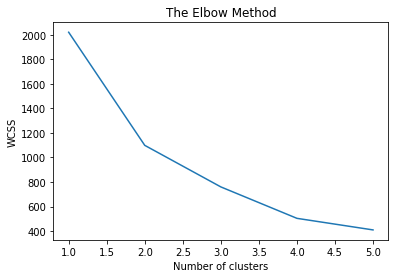

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(arr)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(arr)
y_kmeans = kmeans.fit_predict(arr)
y_kmeans

array([1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 3, 0, 3, 0, 3, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
arr[y_kmeans==0, 0].shape

(28,)

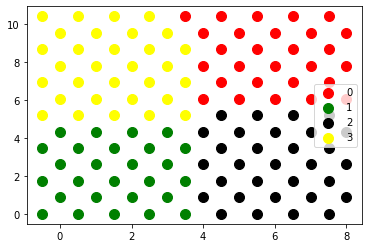

In [ ]:
plt.scatter(arr[y_kmeans==0,0],arr[y_kmeans==0, 1], s=100, c="red", label="0")
plt.scatter(arr[y_kmeans==1,0],arr[y_kmeans==1, 1], s=100, c="green", label="1")
plt.scatter(arr[y_kmeans==2,0],arr[y_kmeans==2, 1], s=100, c="black", label="2")
plt.scatter(arr[y_kmeans==3,0],arr[y_kmeans==3, 1], s=100, c="yellow", label="3")

plt.legend()

NameError: ignored

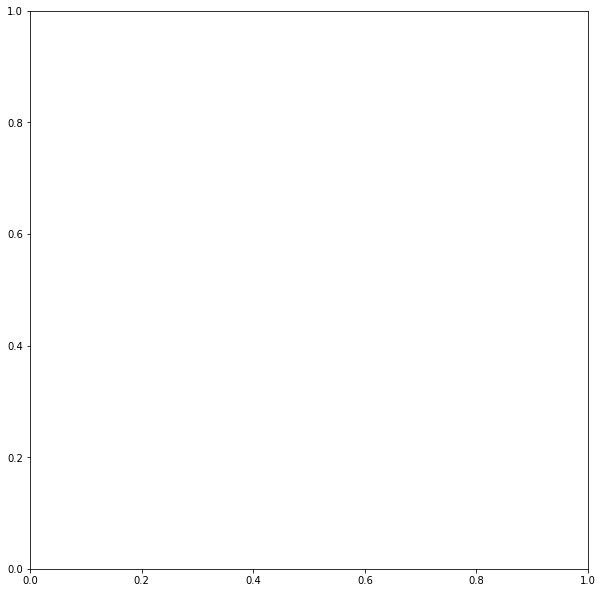

In [34]:
f = plt.figure(figsize=(10,13))
ax = f.add_subplot(111)

ax.set_aspect('equal')
colours = ["red","yellow", "green", "black"]
# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=colours[y_kmeans[i*weights.shape[0] + j ] ], 
                             alpha=.4, 
                             edgecolor='gray')
        ax.add_patch(hex)

markers = ['o', '+', 'x']
colors = ['C0', 'C1', 'C2']
for cnt, x in enumerate(data):
    # getting the winner
    w = som.winner(x)
    # place a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w) 
    wy = wy * np.sqrt(3) / 2
    plt.plot(wx, wy, 
             markers[target[cnt]-1], 
             markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], 
             markersize=12, 
             markeredgewidth=2)

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * np.sqrt(3) / 2, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('distance from neurons in the neighbourhood',
                  rotation=270, fontsize=16)
plt.gcf().add_axes(ax_cb)

legend_elements = [Line2D([0], [0], marker='o', color='C0', label='Low',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='+', color='C1', label='Medium',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='x', color='C2', label='High',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.1, 1.08), loc='upper left', 
          borderaxespad=0., ncol=3, fontsize=14)

plt.show()

In [33]:
hex_centre_col, hex_centre_row = [], []
hex_colour = []
label = []

# define labels
GI_CATEGORIES = ['Low', 'Medium', 'High']
COLOURS = ["#ff0000","#ff00ff", "#00ff00", "#ffff11"]
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex_centre_col.append(xx[(i, j)])
        hex_centre_row.append(wy)
        hex_colour.append(COLOURS[y_kmeans[i*weights.shape[0] + j ] ])

weight_x, weight_y = [], []
for cnt, i in enumerate(data):
    w = som.winner(i)
    wx, wy = som.convert_map_to_euclidean(xy=w)
    wy = wy * np.sqrt(3) / 2
    weight_x.append(wx)
    weight_y.append(wy)
    label.append(GI_CATEGORIES[target[cnt]-1])
    
# convert matplotlib colour palette to bokeh colour palette
# hex_plt = [(255 * np.array(i)).astype(int) for i in hex_colour]
hex_bokeh = hex_colour#[RGB(*tuple(rgb)).to_hex() for rgb in hex_plt]

NameError: ignored

In [ ]:
# initialise figure/plot
fig = figure(title="SOM: Hexagonal Topology",
             plot_height=800, plot_width=800,
             match_aspect=True,
             tools="wheel_zoom,save,reset")

# create data stream for plotting
source_hex = ColumnDataSource(
    data = dict(
        x=hex_centre_col,
        y=hex_centre_row,
        c=hex_bokeh
    )
)

source_pages = ColumnDataSource(
    data=dict(
        wx=weight_x,
        wy=weight_y,
        gi_category=label
    )
)

# define markers
MARKERS = ['diamond', 'cross', 'x']

# add shapes to plot
fig.hex(x='y', y='x', source=source_hex,
        size=135 * (.95 / np.sqrt(3)) ,
        alpha=.4,
        line_color='gray',
        fill_color='c')

fig.scatter(x='wy', y='wx', source=source_pages, 
            legend_field='gi_category',
            size=20, 
            marker=factor_mark(field_name='gi_category', markers=MARKERS, factors=GI_CATEGORIES),
            color=factor_cmap(field_name='gi_category', palette='Category10_3', factors=GI_CATEGORIES))

# add hover-over tooltip
fig.add_tools(HoverTool(
    tooltips=[
        ("label", '@gi_category'),
        ("(x,y)", '($x, $y)')],
    mode="mouse", 
    point_policy="follow_mouse"
))

show(fig)

In [ ]:
new_dataset = dataset.reset_index(drop=True)

In [ ]:
temp_df= []
for cnt, i in enumerate(data):
    w = som.winner(i)
    wx, wy = som.convert_map_to_euclidean(xy=w)
    temp_df.append([
        new_dataset['Name'][cnt],
        new_dataset['Group'][cnt],
        new_dataset['GI Category'][cnt],
        new_dataset['Calories (kcal)'][cnt], 
        new_dataset['Protein (g)'][cnt], 
        new_dataset['Fats (g)'][cnt],
        new_dataset['Carbs (g)'][cnt],
        new_dataset['Fiber (g)'][cnt],
        new_dataset['Sugar (g)'][cnt],
        new_dataset['Phosphorus (mg)'][cnt],
        new_dataset['Potassium (mg)'][cnt],
        new_dataset['Sodium (mg)'][cnt],
        new_dataset['Saturated Fat (g)'][cnt],
        new_dataset['Trans Fat (g)'][cnt],
        y_kmeans[w[0] *weights.shape[0] + w[1] ],
        wx,
        wy])

som_df = pd.DataFrame(temp_df, columns=['Name', 'Group', 'GI',
                                        'Calories (kcal)', 'Protein (g)','Fats (g)', 'Carbs (g)', 
                                        'Fiber (g)', 'Sugar (g)','Phosphorus (mg)','Potassium (mg)','Sodium (mg)','Saturated Fat (g)','Trans Fat (g)',
                                        'Category', 'wx', "wy"])

In [ ]:
# som_df.to_csv(r'/gdrive/Shareddrives/FYP Project/Dataset/SOM_FoodData_Nov15.csv')